In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import squidpy as sq
import gc

In [2]:
adata = sc.read('../../../../../../../media/spencer/Extra HDD/xenium/Xenium_GW18.h5ad')

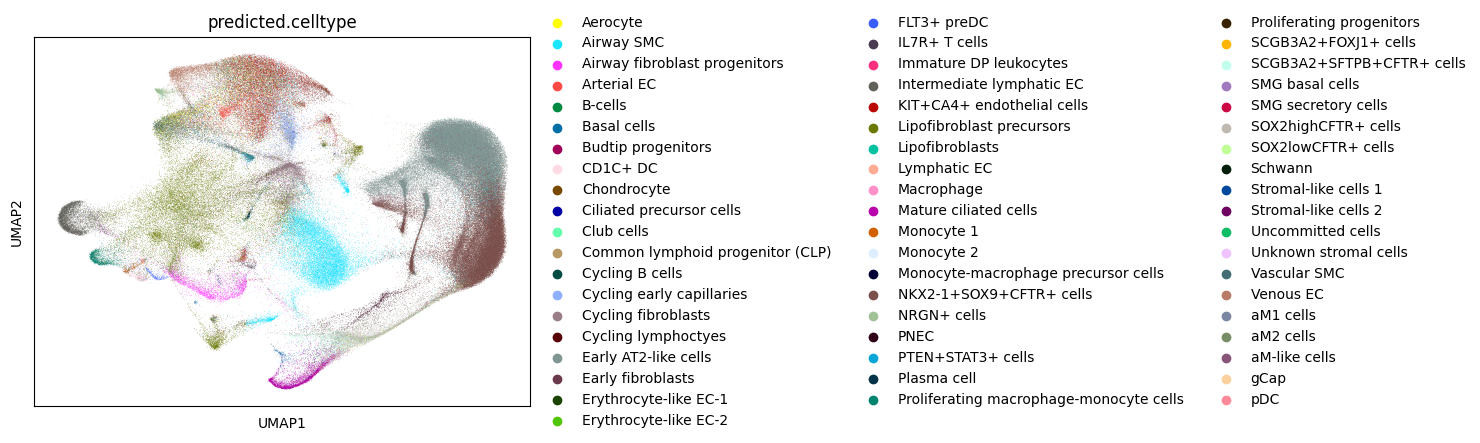

In [3]:
sc.pl.umap(adata, color='predicted.celltype')

In [4]:
sq.gr.spatial_neighbors(adata, spatial_key='centroids', coord_type='generic',
                       radius=75)

sq.gr.nhood_enrichment(adata, cluster_key="predicted.celltype")

  0%|          | 0/1000 [00:00<?, ?/s]

/home/spencer/.local/lib/python3.8/site-packages/squidpy/gr/_nhood.py:182: RuntimeWarning: invalid value encountered in true_divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)


In [5]:
selected_celltypes = ['Mature ciliated cells',
'Basal cells',
'Airway SMC',
'Airway fibroblast progenitors',
'Cycling fibroblasts',
'SMG secretory cells',
'Early fibroblasts',
'Vascular SMC',
'Lipofibroblast precursors',
'SMG basal cells',
'Cycling early capillaries',
'gCap',
'Tip cells',
'Intermediate lymphatic EC',
'NKX2-1+SOX9+CFTR+ cells',
'KIT+CA4+ endothelial cells',
'PTEN+STAT3+ cells',
'SOX2highCFTR+ cells',
'Lymphatic EC',
'Arterial EC',
'Venous EC',
'SCGB3A2+SFTPB+CFTR+ cells',
'PNEC',
'SCGB3A2+FOXJ1+ cells',
'Club cells',
'NRGN+ cells',
'Erythrocyte-like EC-1',
'Chondrocyte',
'SOX2lowCFTR+ cells',
'Proliferating progenitors',
'Ciliated precursor cells',
'Aerocyte',
'Lipofibroblasts',
'Budtip progenitors',
'Uncommitted cells',
'Unknown stromal cells',
'Erythrocyte-like EC-2']

In [7]:
df = pd.DataFrame(adata.uns['predicted.celltype_nhood_enrichment']['zscore'],
                  columns = adata.obs['predicted.celltype'].cat.categories,
                  index = adata.obs['predicted.celltype'].cat.categories).fillna(0)
df['Tip cells'] = df['Early AT2-like cells']
df.rename(index={'Early AT2-like cells':'Tip cells'},inplace=True)

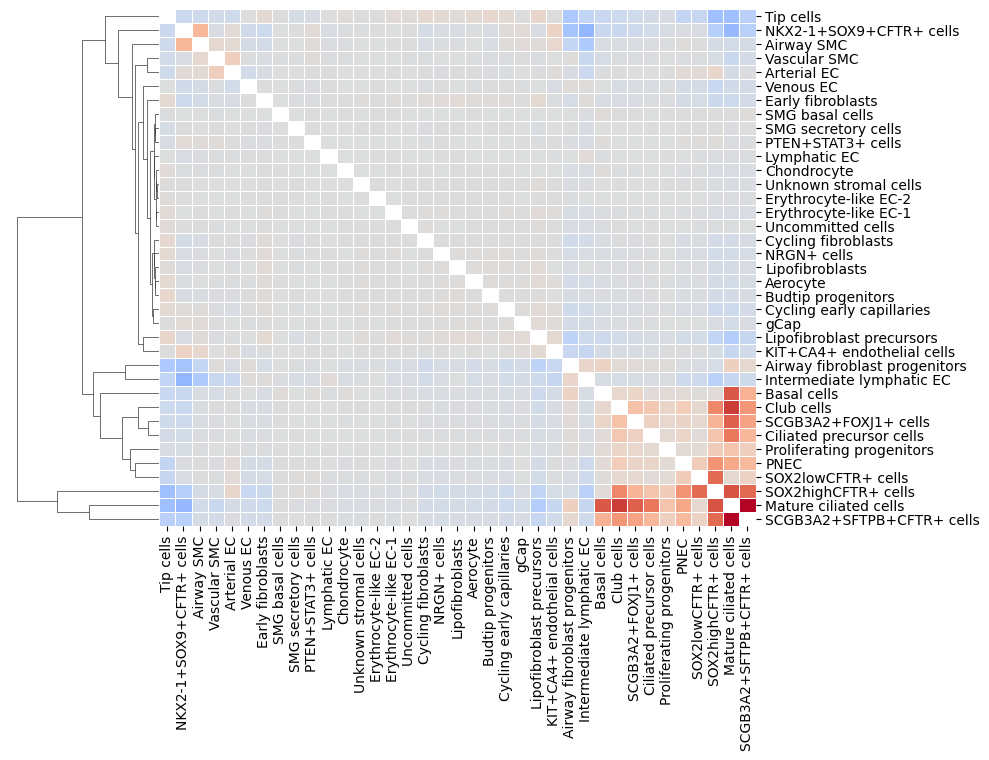

In [8]:
import seaborn as sns

df[selected_celltypes].loc[selected_celltypes].to_csv('xenium_GW18_enrichment.csv')

cg=sns.clustermap(df[selected_celltypes].loc[selected_celltypes], method='weighted', yticklabels=True,
              xticklabels=True,mask=np.eye(df[selected_celltypes].loc[selected_celltypes].shape[0]),
              cmap='coolwarm', center=0,figsize=(10,9),linewidth=0.5, #square=True,
                 vmax=400, vmin=-400)
cg.cax.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
#plt.tight_layout()
plt.savefig('Xenium_neighbor_enrichment_radius75_GW18.pdf', bbox_inches='tight')
plt.show()